# Tabular GAN to make minor attack traffics

### Reference
[GAN-for-tabular-data](https://github.com/Diyago/GAN-for-tabular-data)

In [13]:
from tabgan.sampler import OriginalGenerator, GANGenerator, ForestDiffusionGenerator
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [4]:
# random input data
train = pd.DataFrame(np.random.randint(-10, 150, size=(150, 4)), columns=list("ABCD"))
target = pd.DataFrame(np.random.randint(0, 2, size=(150, 1)), columns=list("Y"))
test = pd.DataFrame(np.random.randint(0, 100, size=(100, 4)), columns=list("ABCD"))

In [5]:
path_train = './data/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
path_test = './data/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'

data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

X_train = data_train.drop("label", axis=1)
X_test = data_test.drop("label", axis=1)

In [6]:
# need to translate the y label first
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 문자열을 숫자로 매핑
label_encoder = LabelEncoder()
data_train['label'] = label_encoder.fit_transform(data_train['label'])
data_test['label'] = label_encoder.fit_transform(data_test['label'])

class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

Class Mapping: {'Backdoor_Malware': 0, 'BenignTraffic': 1, 'BrowserHijacking': 2, 'CommandInjection': 3, 'DDoS-ACK_Fragmentation': 4, 'DDoS-HTTP_Flood': 5, 'DDoS-ICMP_Flood': 6, 'DDoS-ICMP_Fragmentation': 7, 'DDoS-PSHACK_Flood': 8, 'DDoS-RSTFINFlood': 9, 'DDoS-SYN_Flood': 10, 'DDoS-SlowLoris': 11, 'DDoS-SynonymousIP_Flood': 12, 'DDoS-TCP_Flood': 13, 'DDoS-UDP_Flood': 14, 'DDoS-UDP_Fragmentation': 15, 'DNS_Spoofing': 16, 'DictionaryBruteForce': 17, 'DoS-HTTP_Flood': 18, 'DoS-SYN_Flood': 19, 'DoS-TCP_Flood': 20, 'DoS-UDP_Flood': 21, 'MITM-ArpSpoofing': 22, 'Mirai-greeth_flood': 23, 'Mirai-greip_flood': 24, 'Mirai-udpplain': 25, 'Recon-HostDiscovery': 26, 'Recon-OSScan': 27, 'Recon-PingSweep': 28, 'Recon-PortScan': 29, 'SqlInjection': 30, 'Uploading_Attack': 31, 'VulnerabilityScan': 32, 'XSS': 33}


In [49]:
# with open('./data/class_mapping.pkl', 'wb') as file:
#     pickle.dump(class_mapping, file)

In [7]:
y_train = pd.DataFrame(data_train["label"])
y_test = pd.DataFrame(data_test["label"])

# generate data

In [8]:
# Kernel crash
# new_train3, new_target3 = ForestDiffusionGenerator().generate_data_pipe(train, target, test, )

## check the distribution

In [20]:
def fit_predict(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, prediction, average='weighted')
    accuracy = accuracy_score(y_test, prediction)
    return f1, accuracy

In [18]:
# Same as the first model
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=23)

In [19]:
# Takes 26 seconds
initial_f1, initial_accuracy = fit_predict(clf, X_train, y_train, X_test, y_test)
print(f"initial metric; f1: {initial_f1}, accuracy: {initial_accuracy}")

<class 'numpy.float64'>
initial metric; f1: 0.9910838450783486, accuracy: 0.991800918626174


In [ ]:
with open('./data/1_gan_train_v1.pkl', 'rb') as file:
    new_train4 = pickle.load(file)
with open('./data/1_gan_label_v1.pkl', 'rb') as file:
    new_target4 = pickle.load(file)

In [31]:
# Takes 90 seconds
# new_train4 is too big. just run the code to get it.
# new_train4, new_target4 = OriginalGenerator().generate_data_pipe(X_train, y_train, X_test, )
original_f1, original_accuracy = fit_predict(clf, new_train4, new_target4, X_test, y_test)
print(f"OriginalGenerator metric; f1: {original_f1}, accuracy: {original_accuracy}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 175044, number of negative: 175044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2277
[LightGBM] [Info] Number of data points in the train set: 350088, number of used features: 37
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 175044, number of negative: 175044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

In [32]:
# with open('./data/1_gan_train_v1.pkl', 'wb') as file:
#     pickle.dump(new_train4, file)
# with open('./data/1_gan_label_v1.pkl', 'wb') as file:
#     pickle.dump(new_target4, file)

In [ ]:
with open('./data/1_gan_train_v2.pkl', 'rb') as file:
    new_train5 = pickle.load(file)
with open('./data/1_gan_label_v2.pkl', 'rb') as file:
    new_target5 = pickle.load(file)

In [23]:
# Takes 7 mins for for fitting 47 columns
# Takes 18 mins to train for 50 epochs
# new_train5, new_target5 = GANGenerator(gen_x_times=1.1, cat_cols=None,
#            bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
#            adversarial_model_params={
#                "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
#                "learning_rate": 0.02, "random_state": 42, "n_estimators": 100,
#            }, pregeneration_frac=2, only_generated_data=False,
#            gen_params = {"batch_size": 500, "patience": 25, "epochs" : 50,}).generate_data_pipe(X_train, y_train,
#                                           X_test, deep_copy=True, only_adversarial=False, use_adversarial=True)
print("GANGenerator metric", fit_predict(clf, new_train5, new_target5, X_test, y_test))

GANGenerator metric (0.9898087555560163, 0.9907771760243139)


In [ ]:
# with open('./data/1_gan_train_v2.pkl', 'wb') as file:
#     pickle.dump(new_train5, file)
# with open('./data/1_gan_label_v2.pkl', 'wb') as file:
#     pickle.dump(new_target5, file)

# checking the correlation

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(170, 60))
sns.heatmap(X_train.corr(), annot=True, ax=ax[0], fmt = ".2f", cmap="Blues")
sns.heatmap(new_train4.corr(), annot=True, ax=ax[1], fmt = ".2f", cmap="Blues")
ax[0].set_title("Original Data")
ax[1].set_title("OriginalGenerator Data")

Text(0.5, 1.0, 'OriginalGenerator Data')

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(170, 60))
sns.heatmap(X_train.corr(), annot=True, ax=ax[0], fmt = ".2f", cmap="Blues")
sns.heatmap(new_train5.corr(), annot=True, ax=ax[1], fmt = ".2f", cmap="Blues")
ax[0].set_title("Original Data")
ax[1].set_title("CTGANGenerator Data")

Text(0.5, 1.0, 'CTGANGenerator Data')

# Checking the distribution changes

Text(0.5, 1.0, 'OriginalGenerator Data')

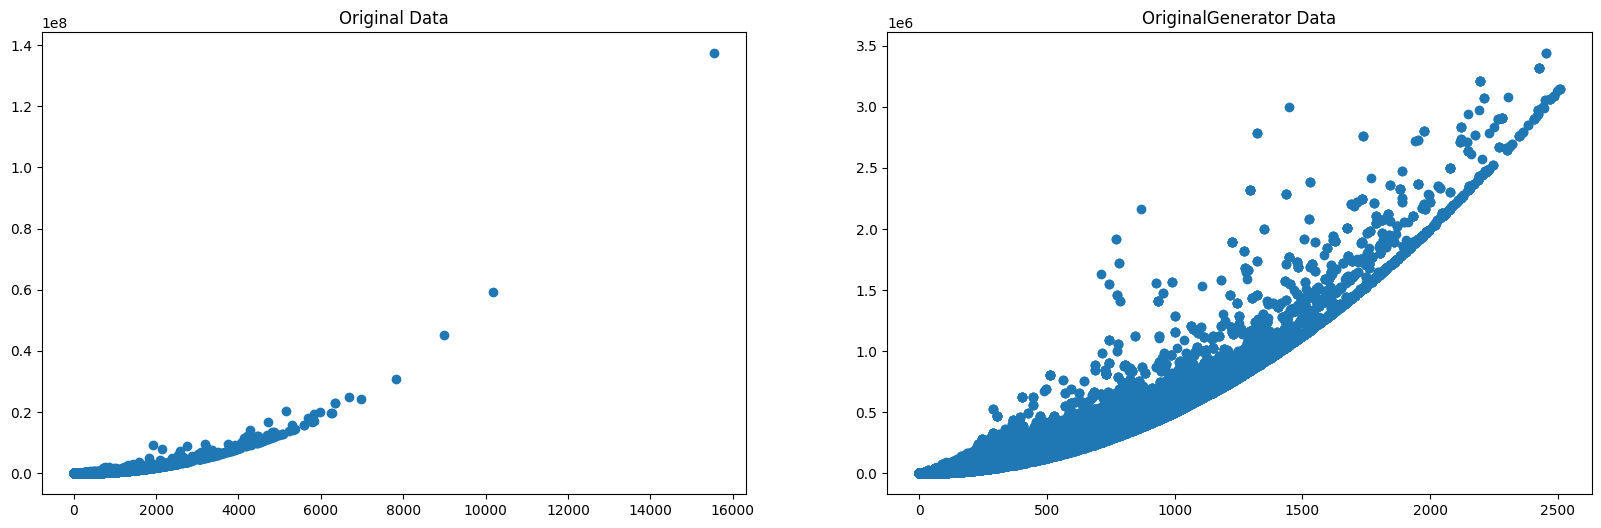

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(X_train.iloc[:, 42], X_train.iloc[:, 43])
ax[1].scatter(new_train4.iloc[:, 42], new_train4.iloc[:, 43])
ax[0].set_title("Original Data")
ax[1].set_title("OriginalGenerator Data")

Text(0.5, 1.0, 'OriginalGenerator Data')

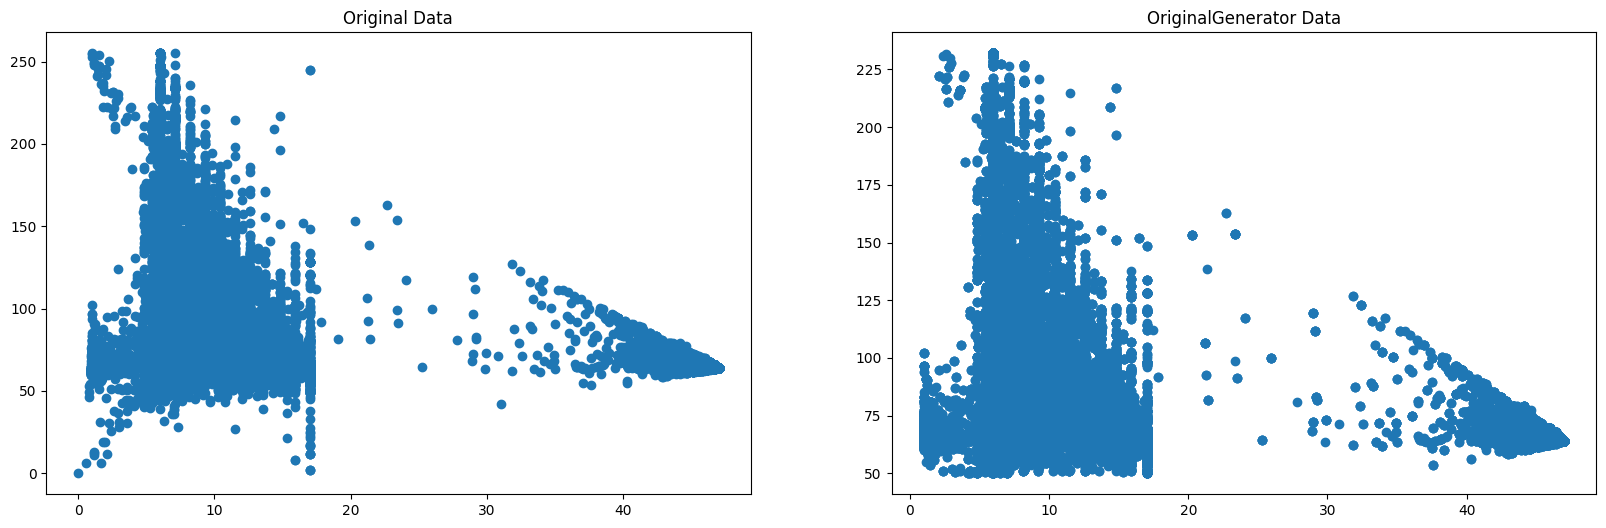

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(X_train.iloc[:, 2], X_train.iloc[:, 3])
ax[1].scatter(new_train4.iloc[:, 2], new_train4.iloc[:, 3])
ax[0].set_title("Original Data")
ax[1].set_title("OriginalGenerator Data")

Text(0.5, 1.0, 'CTGANGenerator Data')

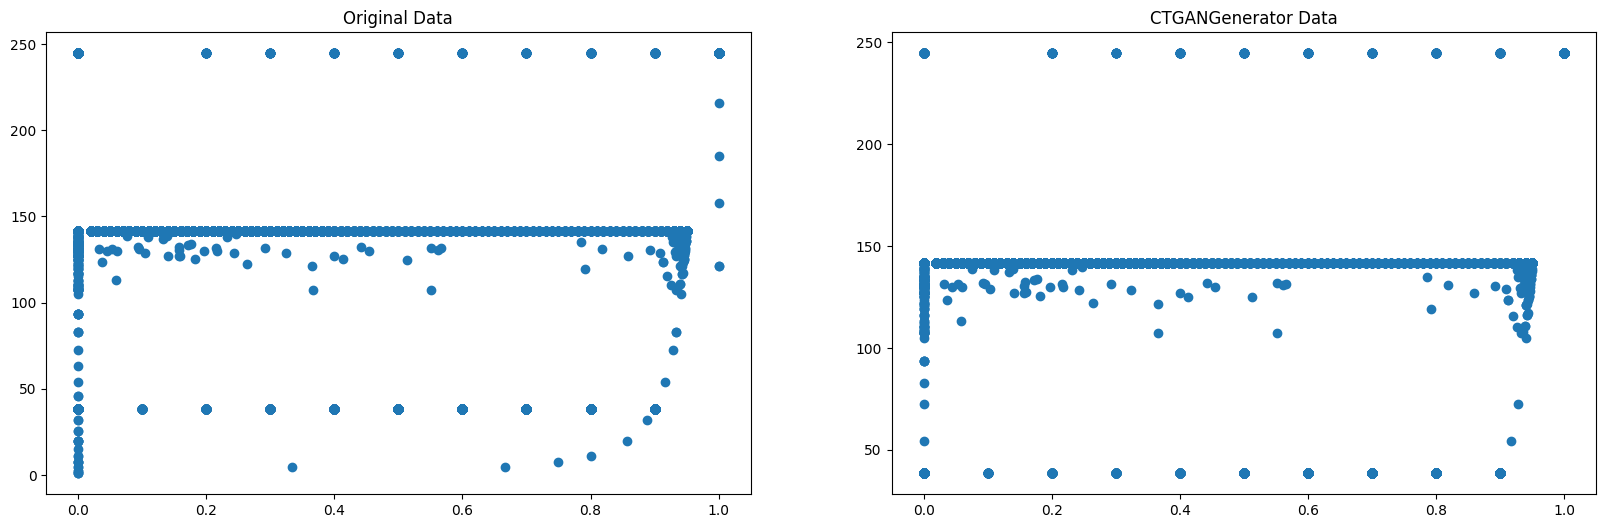

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(X_train.iloc[:, 44], X_train.iloc[:, 45])
ax[1].scatter(new_train5.iloc[:, 44], new_train5.iloc[:, 45])
ax[0].set_title("Original Data")
ax[1].set_title("CTGANGenerator Data")

Text(0.5, 1.0, 'CTGANGenerator Data')

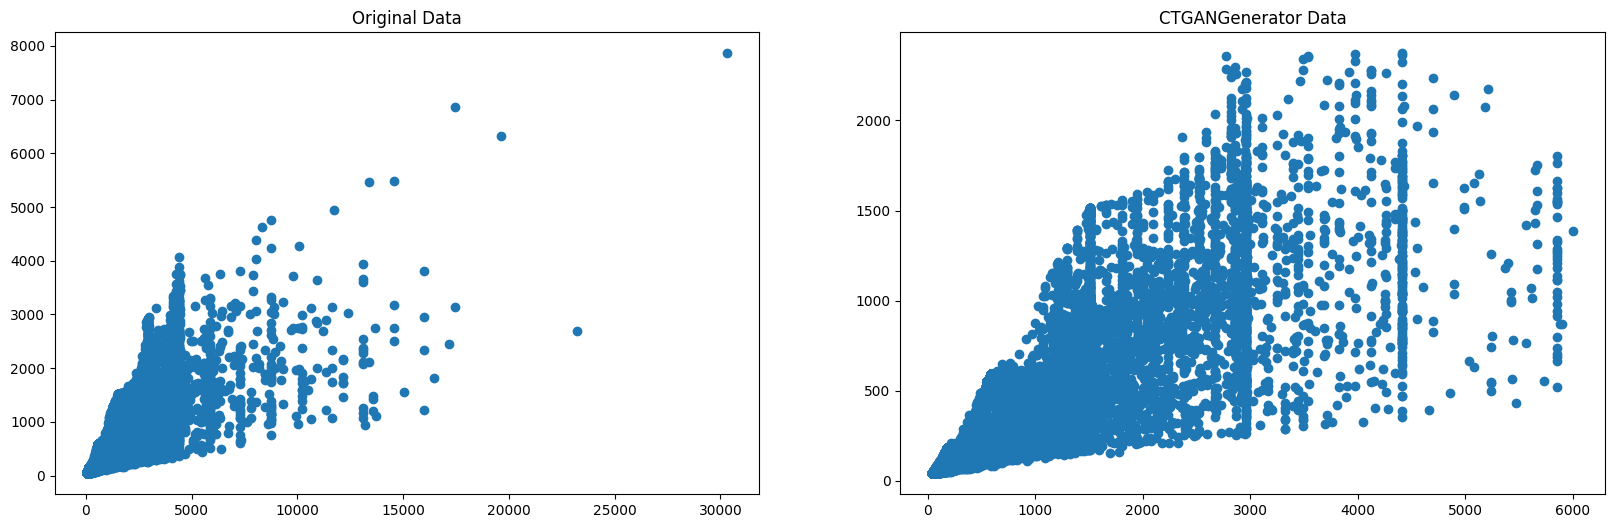

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(X_train.iloc[:, 35], X_train.iloc[:, 36])
ax[1].scatter(new_train5.iloc[:, 35], new_train5.iloc[:, 36])
ax[0].set_title("Original Data")
ax[1].set_title("CTGANGenerator Data")